# https://tinyurl.com/quantumuc2
spratapsi.github.io

In [21]:
%%capture
%pip install qiskit pylatexenc qiskit-aer

In [22]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

simulator = AerSimulator()

Vamos relembrar os conceitos de circuitos quântico.
Primeiro, temos de criar um (ou mais) qubits.

In [23]:
qubits = QuantumRegister(1, name='q')

Agora, criamos um circuito com este qubit, para poder fazer operações.

In [24]:
qc = QuantumCircuit(qubits)

Para já, não fazemos nenhuma operação.
Vamos medir para saber que estado é que está a ser preparado.

In [25]:
qc.measure_all()
qc.draw()  # ou 'mpl', de matplotlib

░ ┌─┐
     q: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0

Agora, vamos correr esta "experiência" várias vezes para saber o resultado das medidas.

{'0': 1024}


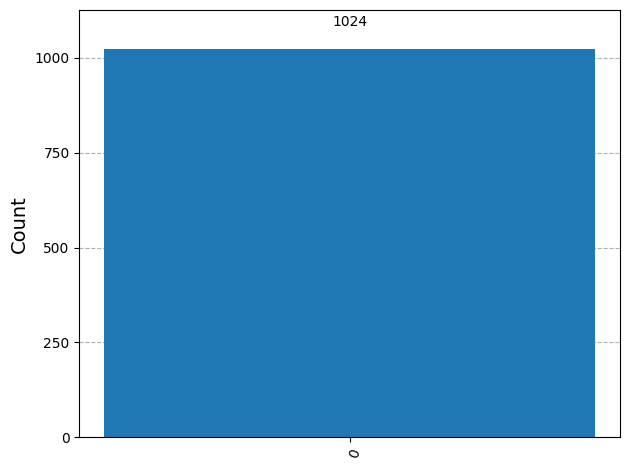

In [26]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

Vamos agora fazer a mesma coisa, mas fazendo a operação de "mandar a moeda ao ar".

In [27]:
qc = QuantumCircuit(qubits)

# Operação H (atirar a moeda ao ar)
qc.h(0)

qc.measure_all()
qc.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

Simulação

{'1': 520, '0': 504}


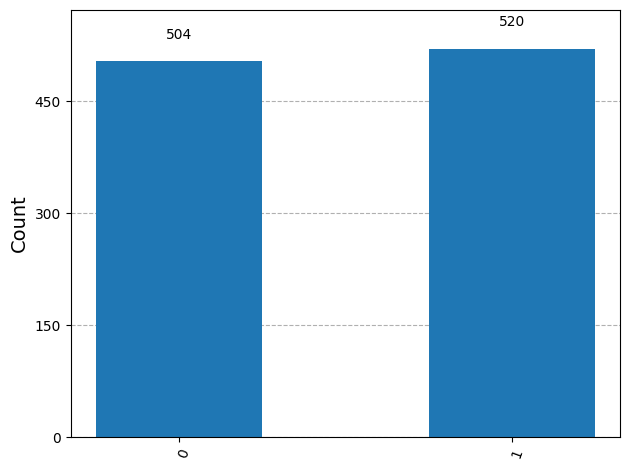

In [28]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

E se aplicarmos a operação duas vezes?

In [29]:
qc = QuantumCircuit(qubits)

qc.h(0)
qc.h(0)

qc.measure_all()
qc.draw()

┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ H ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0

{'0': 1024}


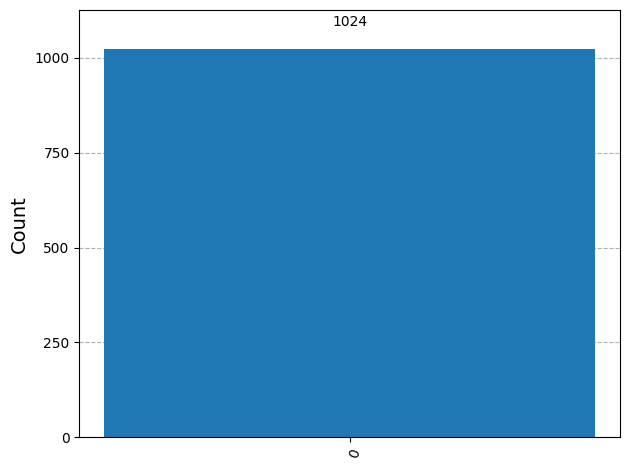

In [30]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

Volta tudo ao estado inicial!

Vamos agora ver como preparar o estado $|1⟩$ em vez de $|0⟩$

In [31]:
qc = QuantumCircuit(qubits)

qc.x(0)
qc.measure_all()
qc.draw()

┌───┐ ░ ┌─┐
     q: ┤ X ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

{'1': 1024, '0': 0}


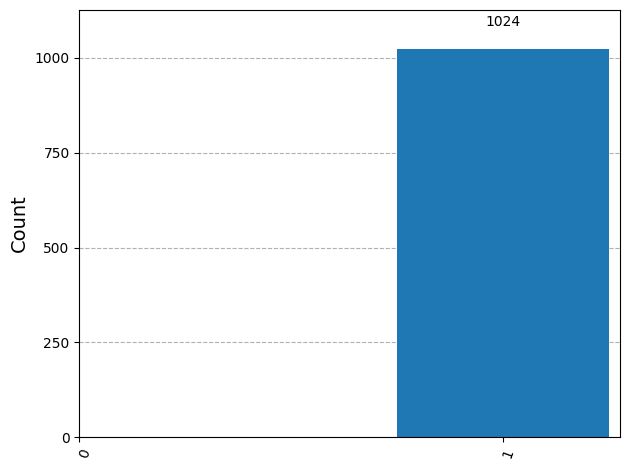

In [32]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

counts['0'] = 0
print(counts)
plot_histogram(counts)

Agora aplicamos a operação $H$ ao estado $|1⟩$.

In [33]:
qc = QuantumCircuit(qubits)

qc.x(0)
qc.h(0)

qc.measure_all()
qc.draw()

┌───┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ H ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0

{'1': 535, '0': 489}


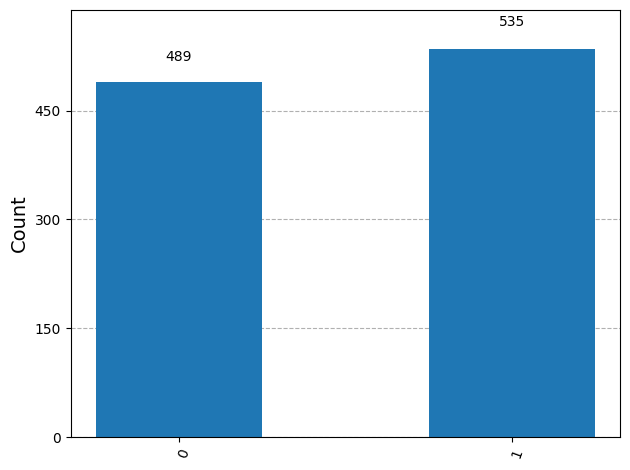

In [34]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

Finalmente, se aplicarmos duas vezes $H$ a $|1⟩$:

In [35]:
qc = QuantumCircuit(qubits)

qc.x(0)
qc.h(0)
qc.h(0)

qc.measure_all()


qc.draw()

┌───┐┌───┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ H ├─░─┤M├
        └───┘└───┘└───┘ ░ └╥┘
meas: 1/═══════════════════╩═
                           0

{'1': 1024}


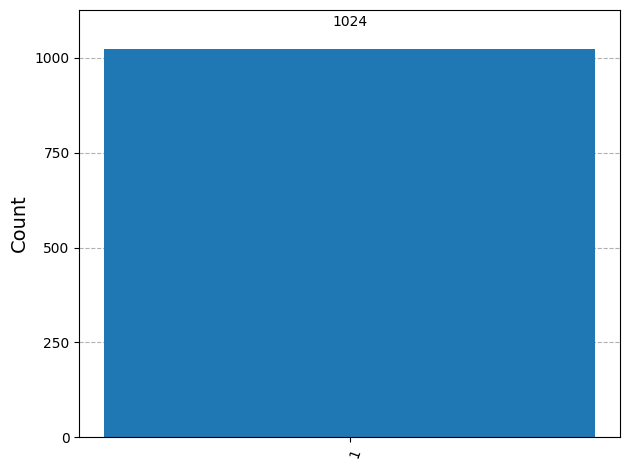

In [36]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

1. Desenhe uma experiência para simular um fotão preparado em $|\theta=30^\circ⟩$, seguido de um polarizador vertical. De 1024 fotões, quantos passarão pelo polarizador?

In [ ]:
from math import pi

qc = QuantumCircuit(1)

theta = pi / 6
qc.ry(2*theta, 0)  

qc.measure_all()
qc.draw()

┌─────────┐ ░ ┌─┐
     q: ┤ Ry(π/3) ├─░─┤M├
        └─────────┘ ░ └╥┘
meas: 1/═══════════════╩═
                       0

{'1': 256, '0': 768}


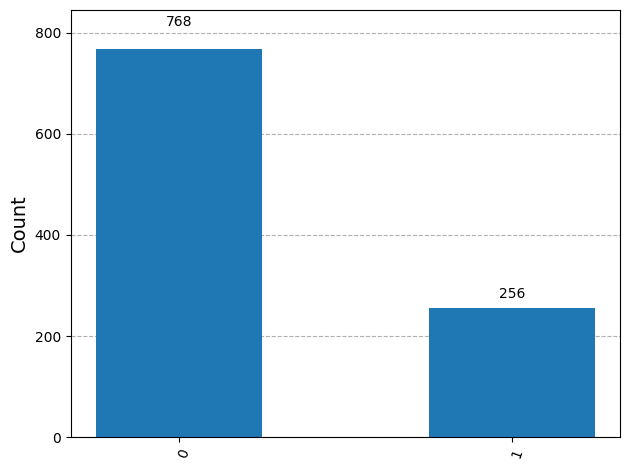

In [50]:
job = simulator.run([qc], shots=1024)
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

2. Crie agora 19 circuitos semelhantes, em que, em vez de 30 graus, o segundo polarizador está, sucessivamente, a 0, 10, 20, ..., 90, 100, 110, ..., 180 graus com a vertical. Utilize 1024 shots.

Guarde as contagens em $|0⟩$ de cada vez, e faça plot da percentagem de vezes que obtém $|0⟩$ em função do ângulo.

In [37]:
import numpy as np

In [38]:
def Rx(theta):
  return np.array([
      [np.cos(theta/2), -1j*np.sin(theta/2)],
      [-1j*np.sin(theta/2), np.cos(theta/2)],
  ])

In [39]:
Rx(np.pi)

array([[6.123234e-17+0.j, 0.000000e+00-1.j],
       [0.000000e+00-1.j, 6.123234e-17+0.j]])

In [40]:
np.array([
    [0, -1j],
    [-1j, 0],
])

array([[ 0.+0.j, -0.-1.j],
       [-0.-1.j,  0.+0.j]])